In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os
import dotenv
import os
import tifffile
import deepmars.utils
import deepmars.features.template_match_target as tmt
import cartopy.crs as ccrs


In [2]:
project_dir = os.path.join(os.getcwd(), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')
found = dotenv.load_dotenv(dotenv_path)

In [3]:
num=175000
prefix="ran"
processed_data = os.path.join(os.getenv("DM_ROOTDIR"),"data/processed")

In [4]:
print("Loading Found Craters")
print("Loading Train Images")

gen_imgs = h5py.File(os.path.join(processed_data, '{}_images_{:05d}.hdf5'.format(prefix,num)), 'r')

craters = pd.HDFStore(os.path.join(deepmars.utils.getenv("DM_ROOTDIR"),
                               'data/predictions/{}_craterdist_{:05d}.hdf5'.format(prefix,num)))
print("Loading Train Craters")
gen_craters = pd.HDFStore(processed_data + '/{}_craters_{:05d}.hdf5'.format(prefix,num), 'r')

hdfcraters = np.load(os.path.join(deepmars.utils.getenv("DM_ROOTDIR"),
                               'data/predictions/{}_craterdist_{:05d}.npy'.format(prefix,num)))


Loading Found Craters
Loading Train Images
Loading Train Craters


In [5]:
list(craters.keys())

['/all',
 '/img_175002',
 '/img_175004',
 '/img_175005',
 '/img_175007',
 '/img_175008',
 '/img_175009',
 '/matches']

In [6]:
img_index=2
img = craters.keys()[img_index].strip("/")
gen_craters[img]

,Lat,Long,Diameter (km),x,y,Diameter (pix)
0,-21.797,169.558,93.47,181.703319,16.469385,72.035269
1,-24.662,166.444,91.50,51.637244,147.337905,70.517033
2,-22.227,168.216,47.62,124.945642,35.815376,36.699684
3,-24.395,167.098,46.83,78.602131,134.870160,36.090849
4,-23.697,170.137,43.79,205.100576,103.350649,33.747988
5,-23.219,166.941,42.20,71.585348,81.304519,32.522610
6,-21.711,169.446,29.90,176.996160,12.509691,23.043271
7,-22.277,170.805,24.89,234.062372,39.059885,19.182174
8,-21.966,169.199,23.24,166.473358,24.049638,17.910556
9,-25.124,170.655,22.20,225.580829,168.743138,17.109051


In [7]:
craters["matches"]

,N_match,N_csv,N_detect,maxr,err_lo,err_la,err_r,frac_dupes
img_175001,0.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.00
img_175002,10.0,18.0,10.0,31.0,0.080379,0.052353,0.068991,0.00
img_175004,18.0,38.0,20.0,34.0,0.131482,0.084421,0.061714,0.05
img_175005,2.0,3.0,2.0,6.0,0.277073,0.065159,0.189813,0.00
img_175007,5.0,32.0,5.0,12.0,0.091582,0.054195,0.045469,0.00
img_175008,6.0,21.0,6.0,11.0,0.076055,0.043038,0.036762,0.00


In [8]:
df = craters["matches"]
tp = (df["N_match"]).sum()
fn = (df["N_csv"] - df["N_match"]).sum()
fp = (df["N_detect"] - df["N_match"]).sum()
print("precision = {:.0f}%".format(100*tp/(tp+fp)))
print("recall = {:.0f}%".format(100*tp/(tp+fn)))


precision = 95%
recall = 36%


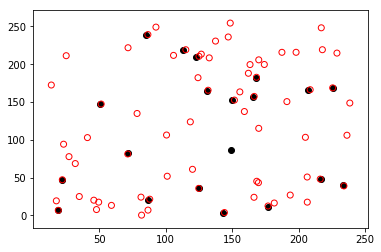

In [9]:
#unprojected dots
#plt.imshow(gen_imgs["input_images"][img_index])
for i,l in craters[img].iterrows():
    plt.scatter(l['x'],l['y'],c='k')
for i,l in gen_craters[img].iterrows():
    plt.scatter(l['x'],l['y'],c='none',marker='o',edgecolor='r')